# 과제 설명
1. matplotlib/seaborn/pandas 패키지를 이용하고, 필요하다면 엑셀 또는 파이썬 코드로 데이터 전처리 수행 
2. 이용한 차트의 종류가 3가지 이상이어야 함 (산점도, 막대 그래프, 라인 그래프 등)
3. 시각화 결과를 해석하고  3가지의 인사이트 도출하기 

# import

## 한글폰트 깨짐방지

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,654 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

폰트를 적용하기 위해서는 상단 메뉴 "런타임> 런타임 다시 시작하기" 후 import 코드부터 다시 실행해야 함 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid") # choose a style for seaborn figure

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/ABChaeeun/mining/main/assignment_vis/data/health_data.csv')
raw_data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


# 전처리

In [17]:
data = pd.DataFrame()

data.insert(0, '가입자일련번호', raw_data['가입자일련번호'])

data.insert(1, '성별', raw_data['성별코드'])
data['성별'].replace(['M','F'], ['남','여'], inplace=True)

data.insert(2, '연령대', raw_data['연령대코드(5세단위)'])
# data['연령대'] = data['연령대'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], ['0~4','5~9','10~14','15~19','20~24','25~29','30~34','35~39','40~44','45~49','50~54','55~59','60~64','65~69','70~74','75~79','80~84','85+'])
# data


data.insert(3, '지역', raw_data['시도코드'])
data['지역'] = data['지역'].replace([11,26,27,28,29,30,31,36,41,42,43,44,45,46,47,48,49],['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주'])

data.insert(4, '신장 (5Cm단위)', raw_data['신장(5Cm단위)'])

data.insert(5, '체중 (5Kg 단위)', raw_data['체중(5Kg 단위)'])

data.insert(6, '음주여부', raw_data['음주여부']) # No / Yes

data.insert(7, '흡연상태', raw_data['흡연상태']) # No / Yes / NotNow
data['흡연상태'] = data['흡연상태'].replace(['No','Yes','NotNow'], ['비흡연자','흡연자','현재는 비흡연자'])


# '간'이랑 관련된 컬럼들 -> 음주여부와 비교
data.insert(8, 'AST', raw_data['(혈청지오티)AST'])
data.insert(9, 'ALT', raw_data['(혈청지오티)ALT'])
data.insert(10, '감마지티피', raw_data['감마지티피'])


# '치아'와 관련된 컬럼들 -> 흡연상태와 비교
data.insert(11, '구강검진여부', raw_data['구강검진수검여부']) # 0(미수검), 1(수검)
data.insert(12, '충치유무', raw_data['치아우식증유무'])
data['충치유무'] = data['충치유무'].replace([0, 1], ['없음', '있음'])
data.insert(13, '치석유무', raw_data['치석'])
data['치석유무'] = data['치석유무'].replace([0, 1, 2], ['없음', '있음', '측정불가'])


# '혈압'과 관련된 컬럼들
data.insert(14, '수축기혈압', raw_data['수축기혈압'])
data.insert(15, '이완기혈압', raw_data['이완기혈압'])
data.insert(16, '혈압차이', raw_data['수축기혈압'] - raw_data['이완기혈압'])

data.insert(17, '콜레스테롤', raw_data['총콜레스테롤'])

data.insert(18, '혈색소', raw_data['혈색소'])

# 인덱스 설정
data.set_index(data['가입자일련번호'], inplace=True)
data.drop(['가입자일련번호'], axis=1, inplace=True)
data

,성별,연령대,지역,신장 (5Cm단위),체중 (5Kg 단위),음주여부,흡연상태,AST,ALT,감마지티피,구강검진여부,충치유무,치석유무,수축기혈압,이완기혈압,혈압차이,콜레스테롤,혈색소
가입자일련번호,,,,,,,,,,,,,,,,,,
1,남,9,세종,165,60,No,비흡연자,21.0,27.0,21.0,0,NaN,NaN,127.0,79.0,48.0,188.0,15.0
2,여,13,대구,150,65,No,비흡연자,18.0,15.0,15.0,0,NaN,NaN,110.0,73.0,37.0,NaN,12.7
3,여,12,서울,155,55,No,비흡연자,27.0,25.0,7.0,0,NaN,NaN,123.0,80.0,43.0,NaN,12.8
4,남,13,울산,160,70,No,비흡연자,65.0,97.0,72.0,1,없음,없음,134.0,84.0,50.0,NaN,16.4
5,여,12,경기,155,50,No,비흡연자,18.0,17.0,14.0,0,NaN,NaN,144.0,89.0,55.0,220.0,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,여,13,충남,155,55,Yes,비흡연자,20.0,21.0,20.0,0,NaN,NaN,120.0,75.0,45.0,NaN,13.7
9997,여,11,충북,160,55,Yes,비흡연자,24.0,22.0,21.0,1,없음,없음,132.0,79.0,53.0,NaN,14.3
9998,남,12,전북,160,80,No,비흡연자,22.0,27.0,35.0,0,NaN,NaN,116.0,75.0,41.0,NaN,15.6


In [18]:
# 연령대코드 전처리

def age_categorize(age):

  if age == 1 or age == 2:
    age = '0'
  elif age == 3 or age == 4:
    age = '10'
  elif age == 5 or age == 6:
    age = '20'
  elif age == 7 or age == 8:
    age = '30'
  elif age == 9 or age == 10:
    age = '40'
  elif age == 11 or age == 12:
    age = '50'
  elif age == 13 or age == 14:
    age = '60'
  elif age == 15 or age == 16:
    age = '70'
  elif age == 17 or age == 18:
    age = '80'
  
  return age


age_category = data.연령대.apply(age_categorize)

data.insert(2, '연령대(10대단위)', age_category)

data['연령대(10대단위)'] = data['연령대(10대단위)'].astype('int64')

성별              object
연령대              int64
연령대(10대단위)       int64
지역              object
신장 (5Cm단위)       int64
체중 (5Kg 단위)      int64
음주여부            object
흡연상태            object
AST            float64
ALT            float64
감마지티피          float64
구강검진여부           int64
충치유무            object
치석유무            object
수축기혈압          float64
이완기혈압          float64
혈압차이           float64
콜레스테롤          float64
혈색소            float64
dtype: object

# 1. 키와 체중과의 관계
`인사이트`

키가 클 수록 체중도 큰 관계가 있다.

양의 상관관계가 있음을 볼 수 있다.

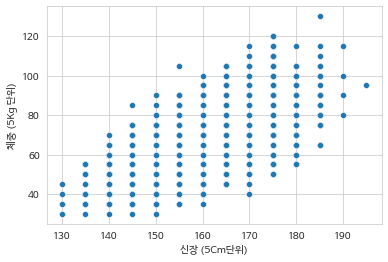

In [9]:
sns.scatterplot(data = data, x = '신장 (5Cm단위)', y = '체중 (5Kg 단위)')

# 2. 흡연상태와 치아의 상관관계
`인사이트`

흡연을 하는 그룹의 충치와 치석 비율이 높은 것을 알 수 있다.

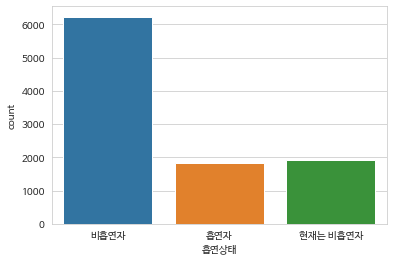

In [10]:
sns.countplot(data = data, x = '흡연상태')

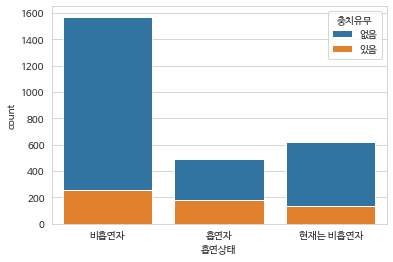

In [11]:
sns.countplot(data = data, x = '흡연상태', hue='충치유무', dodge=False)

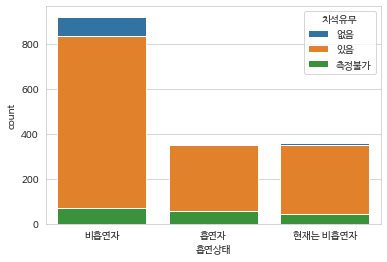

In [12]:
sns.countplot(data = data, x = '흡연상태', hue='치석유무', dodge=False)

# 3. 라인그래프
`인사이트`

연령대가 높아질수록 혈색소가 낮아지는 것을 볼 수 있다.

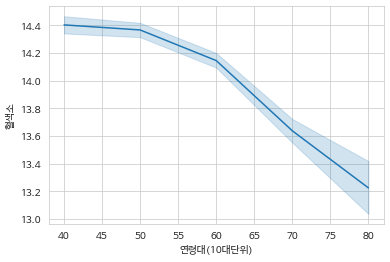

In [13]:
sns.lineplot(data = data, x = '연령대(10대단위)', y = '혈색소')